# NYC Complaint Map Analysis

## Imports

In [157]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [158]:
Complaint_map_df = pd.read_csv('./NYPD_Complaint_Data_Current__Year_To_Date_.csv')
Complaint_map_df

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/3831929074.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Complaint_map_df = pd.read_csv('./NYPD_Complaint_Data_Current__Year_To_Date_.csv')


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,270652286,43.0,BRONX,07/01/2023,05:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,1020219.0,239110.0,40.822912,-73.870041,"(40.8229123084767, -73.8700413043181)",POINT (-73.8700413043181 40.8229123084767)
1,269679657H1,NaN,MANHATTAN,06/09/2023,08:13:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
2,270825324,122.0,STATEN ISLAND,07/02/2023,19:30:00,07/02/2023,20:00:00,COMPLETED,(null),NaN,...,NaN,25-44,WHITE,F,946681.0,142778.0,40.558491,-74.135201,"(40.558491, -74.135201)",POINT (-74.135201 40.558491)
3,274700214,1.0,MANHATTAN,09/19/2023,18:05:00,09/19/2023,20:15:00,COMPLETED,(null),NaN,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,980863.0,198480.0,40.711458,-74.012216,"(40.711458, -74.012216)",POINT (-74.012216 40.711458)
4,272352661,123.0,STATEN ISLAND,08/03/2023,17:20:00,08/03/2023,17:35:00,COMPLETED,(null),NaN,...,NaN,18-24,WHITE,F,926582.0,136703.0,40.541709,-74.207482,"(40.541709, -74.207482)",POINT (-74.207482 40.541709)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415305,267120705,103.0,QUEENS,04/23/2023,03:55:00,04/23/2023,04:03:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK HISPANIC,M,1044256.0,197271.0,40.707937,-73.783565,"(40.707937, -73.783565)",POINT (-73.783565 40.707937)
415306,264248232,105.0,QUEENS,02/19/2023,09:00:00,02/26/2023,08:00:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,F,1062455.0,212970.0,40.750884,-73.717741,"(40.75088412, -73.71774149)",POINT (-73.71774149 40.75088412)
415307,267026380,105.0,QUEENS,04/21/2023,01:50:00,04/21/2023,01:53:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,M,1060576.0,203292.0,40.724337,-73.724633,"(40.72433696, -73.72463296)",POINT (-73.72463296 40.72433696)
415308,269438940,107.0,QUEENS,06/06/2023,09:25:00,06/06/2023,09:27:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,F,1048247.0,200458.0,40.716656,-73.769140,"(40.71665612, -73.76913994)",POINT (-73.76913994 40.71665612)


## Pre-processing

In [159]:
Complaint_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415310 entries, 0 to 415309
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                415310 non-null  object 
 1   ADDR_PCT_CD               415258 non-null  float64
 2   BORO_NM                   415310 non-null  object 
 3   CMPLNT_FR_DT              415310 non-null  object 
 4   CMPLNT_FR_TM              415310 non-null  object 
 5   CMPLNT_TO_DT              388808 non-null  object 
 6   CMPLNT_TO_TM              415310 non-null  object 
 7   CRM_ATPT_CPTD_CD          415310 non-null  object 
 8   HADEVELOPT                415310 non-null  object 
 9   HOUSING_PSA               27225 non-null   float64
 10  JURISDICTION_CODE         415310 non-null  int64  
 11  JURIS_DESC                415310 non-null  object 
 12  KY_CD                     415310 non-null  int64  
 13  LAW_CAT_CD                415310 non-null  o

### Dropping Non-important Columns

In [160]:
Complaint_map_df.drop(['CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HADEVELOPT', 'KY_CD', 'LOC_OF_OCCUR_DESC', 'PD_CD', 'Lat_Lon', 'X_COORD_CD', 'Y_COORD_CD', 'PARKS_NM', 'CRM_ATPT_CPTD_CD', 'JURIS_DESC', 'LAW_CAT_CD', 'HOUSING_PSA', 'JURISDICTION_CODE', 'TRANSIT_DISTRICT', 'New Georeferenced Column', 'STATION_NAME', 'PATROL_BORO'], axis=1, inplace=True)
Complaint_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415310 entries, 0 to 415309
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ADDR_PCT_CD     415258 non-null  float64
 1   BORO_NM         415310 non-null  object 
 2   CMPLNT_FR_DT    415310 non-null  object 
 3   CMPLNT_FR_TM    415310 non-null  object 
 4   OFNS_DESC       415310 non-null  object 
 5   PD_DESC         415310 non-null  object 
 6   PREM_TYP_DESC   415310 non-null  object 
 7   RPT_DT          415310 non-null  object 
 8   SUSP_AGE_GROUP  415310 non-null  object 
 9   SUSP_RACE       415310 non-null  object 
 10  SUSP_SEX        415310 non-null  object 
 11  VIC_AGE_GROUP   415310 non-null  object 
 12  VIC_RACE        415310 non-null  object 
 13  VIC_SEX         415310 non-null  object 
 14  Latitude        415304 non-null  float64
 15  Longitude       415304 non-null  float64
dtypes: float64(3), object(13)
memory usage: 50.7+ MB


### Working with Missing values

#### Dropping Rows with missing values for certain columns

In [161]:
Complaint_map_df = Complaint_map_df.dropna(subset=['ADDR_PCT_CD', 'Latitude', 'Longitude'])
Complaint_map_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415258 entries, 0 to 415309
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ADDR_PCT_CD     415258 non-null  float64
 1   BORO_NM         415258 non-null  object 
 2   CMPLNT_FR_DT    415258 non-null  object 
 3   CMPLNT_FR_TM    415258 non-null  object 
 4   OFNS_DESC       415258 non-null  object 
 5   PD_DESC         415258 non-null  object 
 6   PREM_TYP_DESC   415258 non-null  object 
 7   RPT_DT          415258 non-null  object 
 8   SUSP_AGE_GROUP  415258 non-null  object 
 9   SUSP_RACE       415258 non-null  object 
 10  SUSP_SEX        415258 non-null  object 
 11  VIC_AGE_GROUP   415258 non-null  object 
 12  VIC_RACE        415258 non-null  object 
 13  VIC_SEX         415258 non-null  object 
 14  Latitude        415258 non-null  float64
 15  Longitude       415258 non-null  float64
dtypes: float64(3), object(13)
memory usage: 53.9+ MB


### Searching for Null/Nan values in Categorical columns

In [162]:
PREM_TYP_DESC_mask = Complaint_map_df['PREM_TYP_DESC'].str.contains('None|null|Nan|NaN', na=True, case=False)
OFNS_DESC_mask = Complaint_map_df['OFNS_DESC'].str.contains('None|null|Nan|NaN', na=True, case=False)
PD_DESC_mask = Complaint_map_df['PD_DESC'].str.contains('None|null|Nan|NaN', na=True, case=False)

# The resulting DataFrame with the matched rows
PREM_TYP_DESC_matched_rows = Complaint_map_df[PREM_TYP_DESC_mask]
OFNS_DESC_matched_rows = Complaint_map_df[OFNS_DESC_mask]
PD_DESC_matched_rows = Complaint_map_df[PD_DESC_mask]

print(f"Number of null values in PREM_TYPE_DESC matched is {PREM_TYP_DESC_matched_rows.__len__()}")
print(f"Number of null values in OFNS_DESC matched is {OFNS_DESC_matched_rows.__len__()}")
print(f"Number of null values in PD_DESC matched is {PD_DESC_matched_rows.__len__()}")

Number of null values in PREM_TYPE_DESC matched is 14674
Number of null values in OFNS_DESC matched is 14
Number of null values in PD_DESC matched is 252


#### Drop null values of OFNS_DESC as they are less

In [163]:
Complaint_map_df = Complaint_map_df[Complaint_map_df['OFNS_DESC'] != '(null)']

#### Replace Null values of PD_DESC with Murder as OFNS_DESC for all of them is Murder

In [164]:
Complaint_map_df['PD_DESC'] = Complaint_map_df['PD_DESC'].replace({'(null)': 'Murder'})

In [165]:
PREM_TYP_DESC_mask = Complaint_map_df['PREM_TYP_DESC'].str.contains('None|null|Nan|NaN', na=True, case=False)
OFNS_DESC_mask = Complaint_map_df['OFNS_DESC'].str.contains('None|null|Nan|NaN', na=True, case=False)
PD_DESC_mask = Complaint_map_df['PD_DESC'].str.contains('None|null|Nan|NaN', na=True, case=False)

# The resulting DataFrame with the matched rows
PREM_TYP_DESC_matched_rows = Complaint_map_df[PREM_TYP_DESC_mask]
OFNS_DESC_matched_rows = Complaint_map_df[OFNS_DESC_mask]
PD_DESC_matched_rows = Complaint_map_df[PD_DESC_mask]

print(f"Number of null values in PREM_TYPE_DESC matched is {PREM_TYP_DESC_matched_rows.__len__()}")
print(f"Number of null values in OFNS_DESC matched is {OFNS_DESC_matched_rows.__len__()}")
print(f"Number of null values in PD_DESC matched is {PD_DESC_matched_rows.__len__()}")

Number of null values in PREM_TYPE_DESC matched is 14672
Number of null values in OFNS_DESC matched is 0
Number of null values in PD_DESC matched is 0


### Converting Columns to their correct datatypes

- Converting ADRR_PCT_CD to int
- Converting CMPLNT_FR_DT, CMPLNT_FR_TM, RPT_DT to datetime

In [166]:
Complaint_map_df['ADDR_PCT_CD'] = Complaint_map_df['ADDR_PCT_CD'].astype(int)
Complaint_map_df['CMPLNT_FR_DT'] = pd.to_datetime(Complaint_map_df['CMPLNT_FR_DT'], errors='coerce')
Complaint_map_df['CMPLNT_FR_TM'] = pd.to_datetime(Complaint_map_df['CMPLNT_FR_TM'], errors='coerce')
Complaint_map_df['RPT_DT'] = pd.to_datetime(Complaint_map_df['RPT_DT'], errors='coerce')
Complaint_map_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415244 entries, 0 to 415309
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ADDR_PCT_CD     415244 non-null  int64         
 1   BORO_NM         415244 non-null  object        
 2   CMPLNT_FR_DT    415218 non-null  datetime64[ns]
 3   CMPLNT_FR_TM    415244 non-null  datetime64[ns]
 4   OFNS_DESC       415244 non-null  object        
 5   PD_DESC         415244 non-null  object        
 6   PREM_TYP_DESC   415244 non-null  object        
 7   RPT_DT          415244 non-null  datetime64[ns]
 8   SUSP_AGE_GROUP  415244 non-null  object        
 9   SUSP_RACE       415244 non-null  object        
 10  SUSP_SEX        415244 non-null  object        
 11  VIC_AGE_GROUP   415244 non-null  object        
 12  VIC_RACE        415244 non-null  object        
 13  VIC_SEX         415244 non-null  object        
 14  Latitude        415244 non-null  float64 

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1613667702.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Complaint_map_df['CMPLNT_FR_TM'] = pd.to_datetime(Complaint_map_df['CMPLNT_FR_TM'], errors='coerce')


### OFNS_DESC Categories Filtering

#### Renaming categories

In [167]:
Complaint_map_df['OFNS_DESC'].unique()

array(['RAPE', 'CRIMINAL MISCHIEF & RELATED OF', 'PETIT LARCENY',
       'GRAND LARCENY', 'VEHICLE AND TRAFFIC LAWS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'INTOXICATED & IMPAIRED DRIVING',
       'FELONY ASSAULT', 'THEFT-FRAUD', 'NYS LAWS-UNCLASSIFIED FELONY',
       'OFFENSES INVOLVING FRAUD', 'UNAUTHORIZED USE OF A VEHICLE',
       'CANNABIS RELATED OFFENSES', 'ROBBERY', 'CRIMINAL TRESPASS',
       'DANGEROUS WEAPONS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'MURDER & NON-NEGL. MANSLAUGHTER', 'POSSESSION OF STOLEN PROPERTY',
       'ASSAULT 3 & RELATED OFFENSES', 'DANGEROUS DRUGS', 'FORGERY',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'SEX CRIMES', 'FRAUDS',
       'OTHER STATE LAWS', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OFFENSES AGAINST PUBLIC ADMINI', 'KIDNAPPING & RELATED OFFENSES',
       'GAMBLING', 'ADMINISTRATIVE CODE', 'ARSON', "BURGLAR'S TOOLS",
       'OFFENSES AGAINST PUBLIC SAFETY', 'FRAUDULENT ACCOSTING',
       'OTHER OFFENSES RELATED TO THEF', 'OTHER 

In [99]:
Complaint_map_df['OFNS_DESC'] = Complaint_map_df['OFNS_DESC'].replace({
    'MURDER & NON-NEGL. MANSLAUGHTER': 'MURDER',
    'GRAND LARCENY OF MOTOR VEHICLE': 'GRAND LARCENY',
    'FELONY ASSAULT': 'ASSAULT',
    'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT',
    'PROSTITUTION & RELATED OFFENSES': 'PROSTITUTION',
    'UNLAWFUL POSS. WEAP. ON SCHOOL': 'POSSESSION OF WEAPONS',
    'DANGEROUS WEAPONS': 'POSSESSION OF WEAPONS',
    'FELONY SEX CRIMES': 'SEX CRIMES',
    'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE',
    'HOMICIDE-NEGLIGENT-VEHICLE': 'HOMICIDE',
    'KIDNAPPING & RELATED OFFENSES': 'KIDNAPPING',
    'HARRASSMENT 2': 'HARRASSMENT',
    'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION'
})

#### Defining Required Categories

#### Category selection based on proportion of data

In [100]:
categories_to_keep = ['RAPE', 'GRAND LARCENY', 'ASSAULT', 'ROBBERY', 'POSSESSION OF WEAPONS', 'MURDER', 'BURGLARY', 'SEX CRIMES', 'DANGEROUS DRUGS', 'KIDNAPPING', 'PROSTITUTION', 'HARRASSMENT', 'HOMICIDE', 'OFFENSES RELATED TO CHILDREN', 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION']

#### Keeping only rows that come under the required categories

In [101]:
Complaint_map_df = Complaint_map_df[Complaint_map_df['OFNS_DESC'].isin(categories_to_keep)]

In [102]:
Complaint_map_df

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,PREM_TYP_DESC,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
0,43,BRONX,2023-07-01,2023-11-20 05:00:00,RAPE,RAPE 1,(null),2023-07-01,25-44,WHITE,M,25-44,UNKNOWN,F,40.822912,-73.870041
4,123,STATEN ISLAND,2023-08-03,2023-11-20 17:20:00,GRAND LARCENY,"LARCENY,GRAND FROM EATERY, UNATTENDED",FAST FOOD,2023-08-03,25-44,ASIAN / PACIFIC ISLANDER,M,18-24,WHITE,F,40.541709,-74.207482
11,120,STATEN ISLAND,2023-03-24,2023-11-20 08:15:00,GRAND LARCENY,"LARCENY,GRAND OF AUTO",STREET,2023-03-24,(null),(null),(null),45-64,BLACK HISPANIC,M,40.639472,-74.092840
16,72,BROOKLYN,2023-05-12,2023-11-20 16:00:00,GRAND LARCENY,"LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT",RESIDENCE-HOUSE,2023-05-13,(null),(null),(null),45-64,ASIAN / PACIFIC ISLANDER,M,40.639575,-74.012485
34,62,BROOKLYN,2023-01-15,2023-11-20 22:10:00,ASSAULT,ASSAULT POLICE/PEACE OFFICER,RESIDENCE-HOUSE,2023-01-15,18-24,ASIAN / PACIFIC ISLANDER,M,25-44,WHITE,L,40.611438,-74.011853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415303,103,QUEENS,2023-08-11,2023-11-20 14:50:00,HARRASSMENT,"HARASSMENT,SUBD 3,4,5",GROCERY/BODEGA,2023-08-11,UNKNOWN,UNKNOWN,U,18-24,UNKNOWN,M,40.713437,-73.760939
415304,105,QUEENS,2023-07-14,2023-11-20 08:28:00,HARRASSMENT,"HARASSMENT,SUBD 3,4,5",RESIDENCE-HOUSE,2023-07-14,18-24,BLACK,F,18-24,BLACK,F,40.664824,-73.753460
415305,103,QUEENS,2023-04-23,2023-11-20 03:55:00,ASSAULT,ASSAULT 3,BAR/NIGHT CLUB,2023-04-23,18-24,WHITE HISPANIC,M,25-44,BLACK HISPANIC,M,40.707937,-73.783565
415308,107,QUEENS,2023-06-06,2023-11-20 09:25:00,HARRASSMENT,"HARASSMENT,SUBD 3,4,5",BUS (NYC TRANSIT),2023-06-06,25-44,BLACK,M,25-44,BLACK,F,40.716656,-73.769140


### Working on SUSP_AGE_GROUP and VIC_AGE_GROUP columns

#### Specify the categories of age groups

In [103]:
age_group = ['<18', '18-24', '25-44', '45-64', '65+']

#### Replace Outliers of VIC_AGE_GROUP and SUSP_AGE_GROUP with UNKNOWN

In [104]:
Complaint_map_df['VIC_AGE_GROUP'] = Complaint_map_df['VIC_AGE_GROUP'].apply(lambda x:x if x in age_group else 'UNKNOWN')

In [105]:
Complaint_map_df['SUSP_AGE_GROUP'] = Complaint_map_df['SUSP_AGE_GROUP'].apply(lambda x:x if x in age_group else 'UNKNOWN')

#### Distributing UNKOWN age values with the proportional distribution of the current age data

- VIC_AGE_GROUP

In [168]:
Complaint_map_df['VIC_AGE_GROUP']

VIC_AGE_GROUP
25-44      146951
UNKNOWN    119255
45-64       77333
18-24       34054
65+         21492
<18         16132
-30             3
-2              3
1023            3
-964            2
1022            2
-61             1
-58             1
949             1
-970            1
-6              1
-961            1
1018            1
1020            1
-968            1
-3              1
-929            1
953             1
-10             1
-33             1
Name: count, dtype: int64

In [106]:
# Count the frequency of each category (excluding 'Unknown')
category_counts = Complaint_map_df['VIC_AGE_GROUP'][Complaint_map_df['VIC_AGE_GROUP'] != 'UNKNOWN'].value_counts(normalize=True)

# Count how many 'Unknown' need to be replaced
unknown_count = Complaint_map_df['VIC_AGE_GROUP'].value_counts()['UNKNOWN']

# Generate new categories based on the distribution
new_categories = np.random.choice(category_counts.index, size=unknown_count, p=category_counts.values)

# Replace 'Unknown' with the new categories
unknown_indices = Complaint_map_df.index[Complaint_map_df['VIC_AGE_GROUP'] == 'UNKNOWN']
Complaint_map_df.loc[unknown_indices, 'VIC_AGE_GROUP'] = new_categories
Complaint_map_df['VIC_AGE_GROUP'].value_counts()

VIC_AGE_GROUP
25-44    117123
45-64     59022
18-24     29389
<18       16696
65+       15478
Name: count, dtype: int64

- SUSP_AGE_GROUP

In [107]:
# Count the frequency of each category (excluding 'Unknown')
category_counts = Complaint_map_df['SUSP_AGE_GROUP'][Complaint_map_df['SUSP_AGE_GROUP'] != 'UNKNOWN'].value_counts(normalize=True)

# Count how many 'Unknown' need to be replaced
unknown_count = Complaint_map_df['SUSP_AGE_GROUP'].value_counts()['UNKNOWN']

# Generate new categories based on the distribution
new_categories = np.random.choice(category_counts.index, size=unknown_count, p=category_counts.values)

# Replace 'Unknown' with the new categories
unknown_indices = Complaint_map_df.index[Complaint_map_df['SUSP_AGE_GROUP'] == 'UNKNOWN']
Complaint_map_df.loc[unknown_indices, 'SUSP_AGE_GROUP'] = new_categories
Complaint_map_df['SUSP_AGE_GROUP'].value_counts()

SUSP_AGE_GROUP
25-44    134528
45-64     48612
18-24     34862
<18       13307
65+        6399
Name: count, dtype: int64

### Working on SUSP_RACE and VIC_RACE columns

#### Defining RACE Categories

In [108]:
race_category = ['BLACK', 'WHITE HISPANIC', 'WHITE', 'BLACK HISPANIC', 'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE']

#### Replace Outliers of SUSP_RACE and VIC_RACE with UNKNOWN

In [109]:
Complaint_map_df['SUSP_RACE'] = Complaint_map_df['SUSP_RACE'].apply(lambda x:x if x in race_category else 'UNKNOWN')

In [110]:
Complaint_map_df['VIC_RACE'] = Complaint_map_df['VIC_RACE'].apply(lambda x:x if x in race_category else 'UNKNOWN')

#### Distributing UNKNOWN race values with the proportional distribution of the current race data

In [111]:
# Count the frequency of each category (excluding 'Unknown')
category_counts = Complaint_map_df['SUSP_RACE'][Complaint_map_df['SUSP_RACE'] != 'UNKNOWN'].value_counts(normalize=True)

# Count how many 'Unknown' need to be replaced
unknown_count = Complaint_map_df['SUSP_RACE'].value_counts()['UNKNOWN']

# Generate new categories based on the distribution
new_categories = np.random.choice(category_counts.index, size=unknown_count, p=category_counts.values)

# Replace 'Unknown' with the new categories
unknown_indices = Complaint_map_df.index[Complaint_map_df['SUSP_RACE'] == 'UNKNOWN']
Complaint_map_df.loc[unknown_indices, 'SUSP_RACE'] = new_categories
Complaint_map_df['SUSP_RACE'].value_counts()

SUSP_RACE
BLACK                             120813
WHITE HISPANIC                     57143
WHITE                              26677
BLACK HISPANIC                     18570
ASIAN / PACIFIC ISLANDER           13606
AMERICAN INDIAN/ALASKAN NATIVE       899
Name: count, dtype: int64

In [112]:
# Count the frequency of each category (excluding 'Unknown')
category_counts = Complaint_map_df['VIC_RACE'][Complaint_map_df['VIC_RACE'] != 'UNKNOWN'].value_counts(normalize=True)

# Count how many 'Unknown' need to be replaced
unknown_count = Complaint_map_df['VIC_RACE'].value_counts()['UNKNOWN']

# Generate new categories based on the distribution
new_categories = np.random.choice(category_counts.index, size=unknown_count, p=category_counts.values)

# Replace 'Unknown' with the new categories
unknown_indices = Complaint_map_df.index[Complaint_map_df['VIC_RACE'] == 'UNKNOWN']
Complaint_map_df.loc[unknown_indices, 'VIC_RACE'] = new_categories
Complaint_map_df['VIC_RACE'].value_counts()

VIC_RACE
BLACK                             84063
WHITE HISPANIC                    64712
WHITE                             45084
ASIAN / PACIFIC ISLANDER          26363
BLACK HISPANIC                    16098
AMERICAN INDIAN/ALASKAN NATIVE     1388
Name: count, dtype: int64

### Working on SUSP_SEX and VIC_SEX columns

#### Defining Sex Categories

In [113]:
sex_category = ['M', 'F']

#### Replacing other sex categories as Unknown

In [114]:
Complaint_map_df['SUSP_SEX'] = Complaint_map_df['SUSP_SEX'].apply(lambda x:x if x in sex_category else 'UNKNOWN')

In [115]:
Complaint_map_df['VIC_SEX'] = Complaint_map_df['VIC_SEX'].apply(lambda x:x if x in sex_category else 'UNKNOWN')

#### Distributing UNKNOWN sex values with the proportional distribution of the current sex data

In [116]:
# Count the frequency of each category (excluding 'Unknown')
category_counts = Complaint_map_df['SUSP_SEX'][Complaint_map_df['SUSP_SEX'] != 'UNKNOWN'].value_counts(normalize=True)

# Count how many 'Unknown' need to be replaced
unknown_count = Complaint_map_df['SUSP_SEX'].value_counts()['UNKNOWN']

# Generate new categories based on the distribution
new_categories = np.random.choice(category_counts.index, size=unknown_count, p=category_counts.values)

# Replace 'Unknown' with the new categories
unknown_indices = Complaint_map_df.index[Complaint_map_df['SUSP_SEX'] == 'UNKNOWN']
Complaint_map_df.loc[unknown_indices, 'SUSP_SEX'] = new_categories
Complaint_map_df['SUSP_SEX'].value_counts()

SUSP_SEX
M    179252
F     58456
Name: count, dtype: int64

In [117]:
# Count the frequency of each category (excluding 'Unknown')
category_counts = Complaint_map_df['VIC_SEX'][Complaint_map_df['VIC_SEX'] != 'UNKNOWN'].value_counts(normalize=True)

# Count how many 'Unknown' need to be replaced
unknown_count = Complaint_map_df['VIC_SEX'].value_counts()['UNKNOWN']

# Generate new categories based on the distribution
new_categories = np.random.choice(category_counts.index, size=unknown_count, p=category_counts.values)

# Replace 'Unknown' with the new categories
unknown_indices = Complaint_map_df.index[Complaint_map_df['VIC_SEX'] == 'UNKNOWN']
Complaint_map_df.loc[unknown_indices, 'VIC_SEX'] = new_categories
Complaint_map_df['VIC_SEX'].value_counts()

VIC_SEX
F    127797
M    109911
Name: count, dtype: int64

### Handling Missing BORO_NM

In [118]:
borough_mapping = {
    range(1,35): 'MANHATTAN',
    range(40, 53): 'BRONX',
    range(60, 95): 'BROOKLYN',
    range(100, 116): 'QUEENS',
    range(120, 124): 'STATEN ISLAND'
}

#### Based on Precinct Number, replace null with the correct borough

In [119]:
def apply_mapping(row):
    if row['BORO_NM'] == '(null)':
        for key in borough_mapping:
            if row['ADDR_PCT_CD'] in key:
                return borough_mapping[key]
    return row['BORO_NM']

In [120]:
Complaint_map_df['BORO_NM'] = Complaint_map_df.apply(apply_mapping, axis=1)

## EDA

### Temporal Analysis

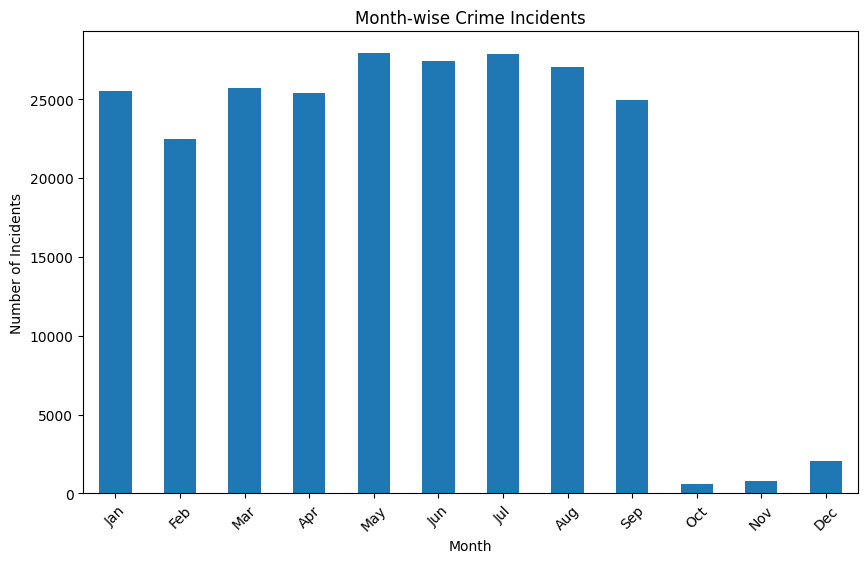

In [123]:
monthly_data = Complaint_map_df['CMPLNT_FR_DT'].dt.month.groupby(Complaint_map_df['CMPLNT_FR_DT'].dt.month).size()

# Plot
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='bar')
plt.title('Month-wise Crime Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

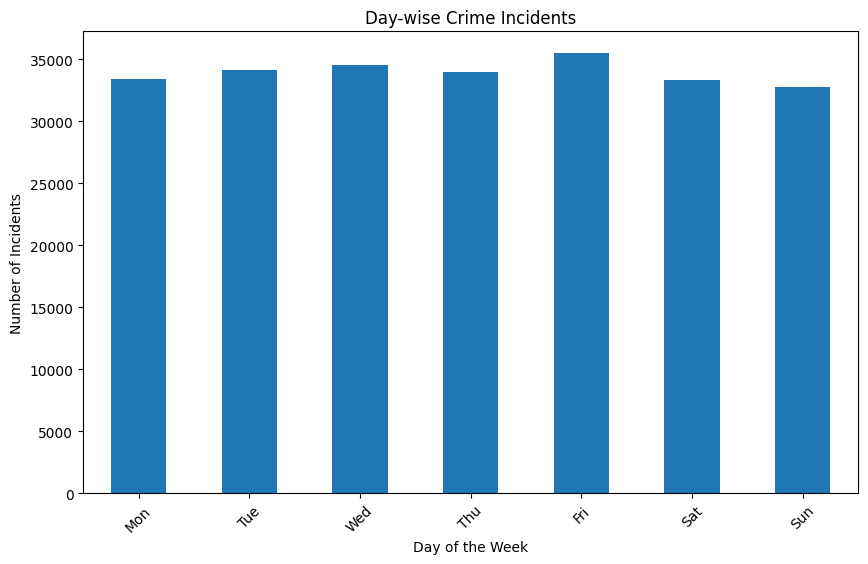

In [121]:
daywise_data = Complaint_map_df['CMPLNT_FR_DT'].dt.dayofweek.groupby(Complaint_map_df['CMPLNT_FR_DT'].dt.dayofweek).size()

# Plot
plt.figure(figsize=(10, 6))
daywise_data.plot(kind='bar')
plt.title('Day-wise Crime Incidents')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

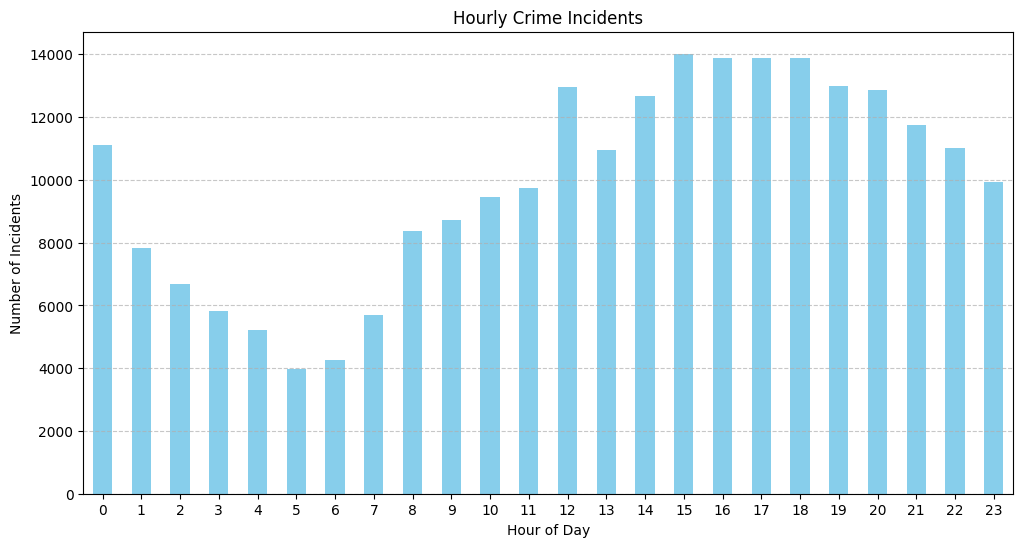

In [154]:
plt.figure(figsize=(12, 6))
Complaint_map_df['CMPLNT_FR_TM'].dt.hour.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.title('Hourly Crime Incidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Borough Distribution

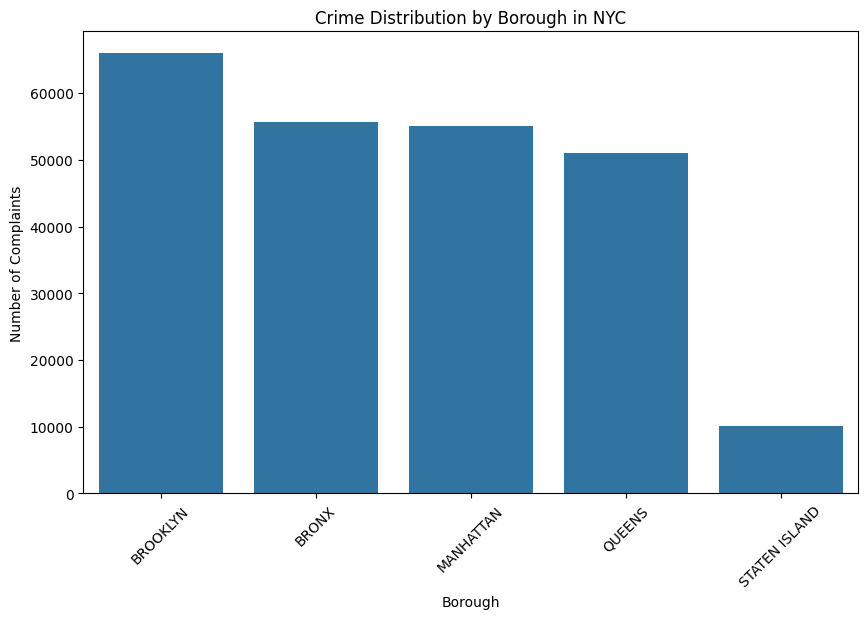

In [125]:
borough_distribution = Complaint_map_df['BORO_NM'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_distribution.index, y=borough_distribution.values)
plt.title('Crime Distribution by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

### Borough - Precinct Analysis

#### Top 10 Precincts, Boroush-wise

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1708679130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='ADDR_PCT_CD', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1708679130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='ADDR_PCT_CD', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1708679130.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barp

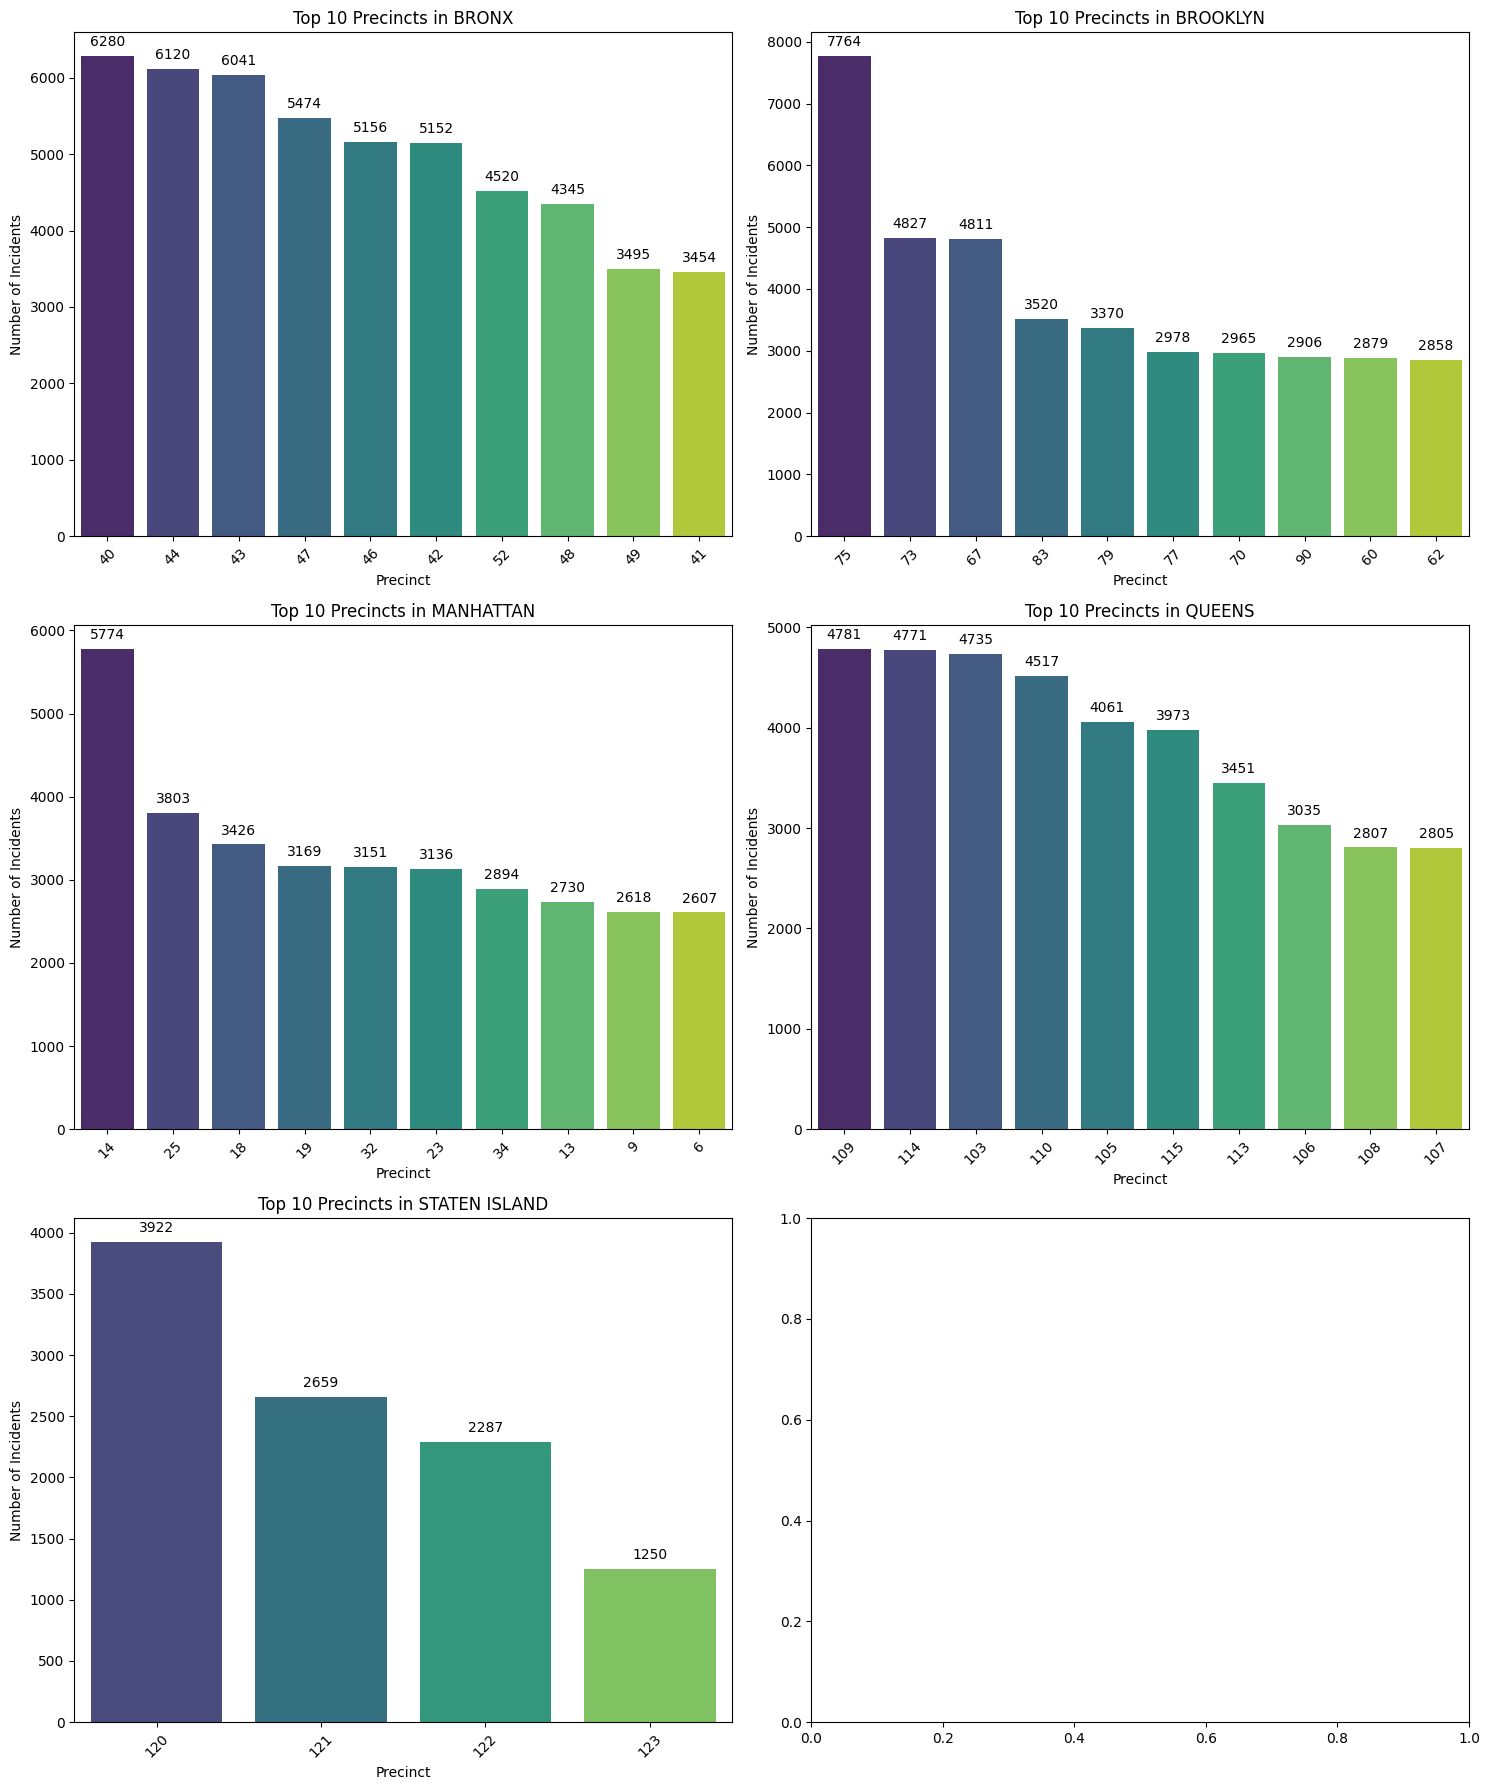

In [129]:
borough_precinct_data = Complaint_map_df.groupby(['BORO_NM', 'ADDR_PCT_CD']).size().reset_index(name='counts')

# Get top 10 precincts for each borough
top_precincts = borough_precinct_data.groupby('BORO_NM').apply(lambda x: x.nlargest(10, 'counts')).reset_index(drop=True)

# Convert 'Incident Pct' to a string
top_precincts['ADDR_PCT_CD'] = top_precincts['ADDR_PCT_CD'].astype(str)

# Unique list of boroughs
boroughs = top_precincts['BORO_NM'].unique()

# Determine the number of rows needed for the subplots
num_rows = (len(boroughs) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))
axes = axes.flatten()  # Flatten the array for easy iteration

# Plot for each borough
for i, borough in enumerate(boroughs):
    borough_data = top_precincts[top_precincts['BORO_NM'] == borough]
    ax=sns.barplot(data=borough_data, x='ADDR_PCT_CD', y='counts', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Top 10 Precincts in {borough}')
    axes[i].set_xlabel('Precinct')
    axes[i].set_ylabel('Number of Complaints')
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

#### Least 10 Precincts, Boroush-wise

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/4176545880.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='ADDR_PCT_CD', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/4176545880.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=borough_data, x='ADDR_PCT_CD', y='counts', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/4176545880.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barp

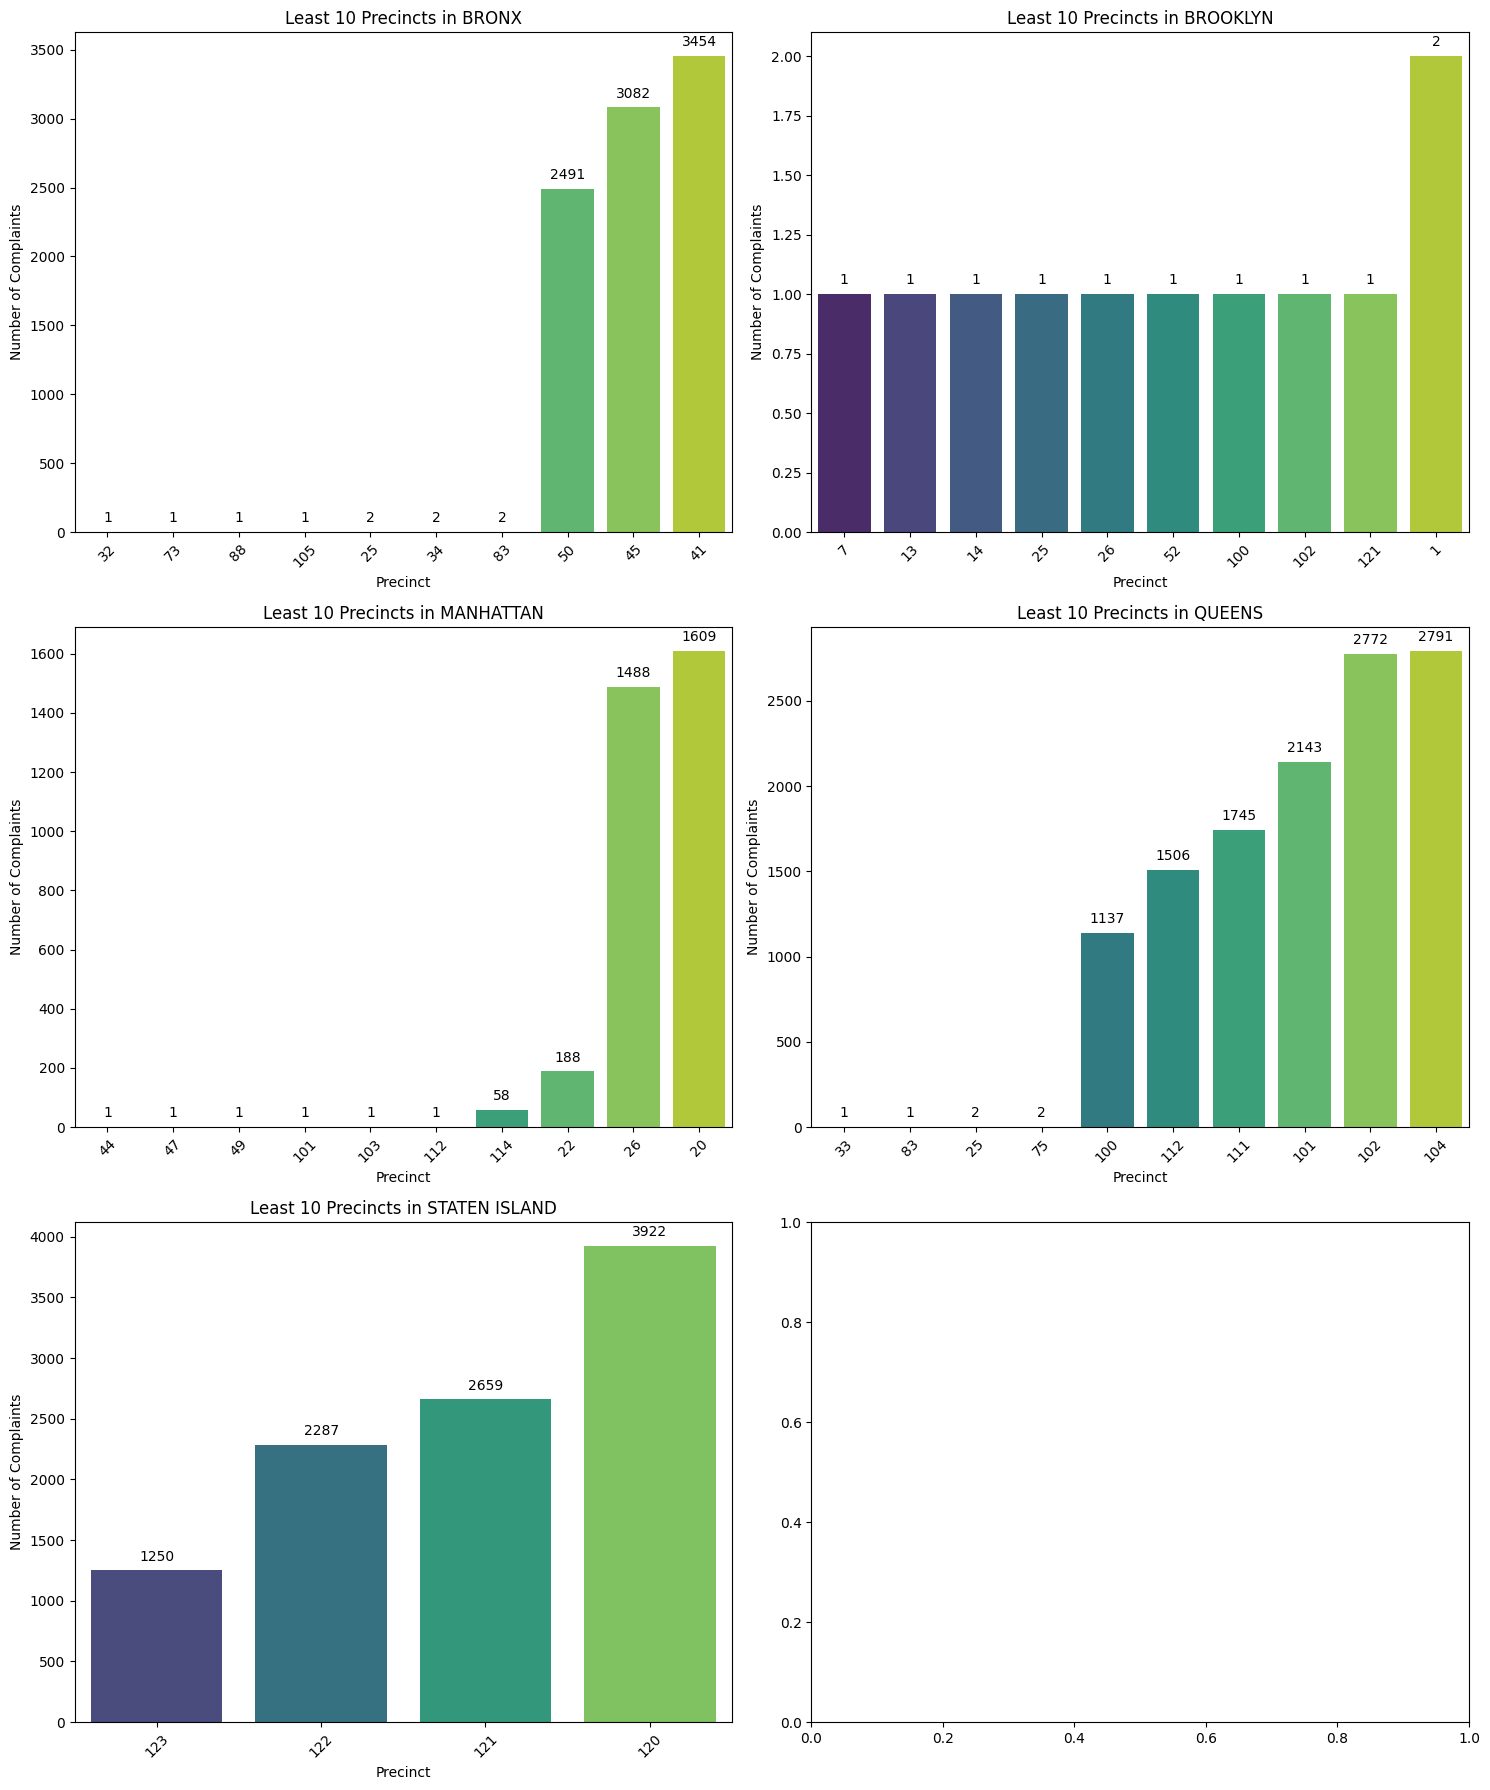

In [130]:
borough_precinct_data = Complaint_map_df.groupby(['BORO_NM', 'ADDR_PCT_CD']).size().reset_index(name='counts')

# Get top 10 precincts for each borough
least_precincts = borough_precinct_data.groupby('BORO_NM').apply(lambda x: x.nsmallest(10, 'counts')).reset_index(drop=True)

# Convert 'Incident Pct' to a string
least_precincts['ADDR_PCT_CD'] = least_precincts['ADDR_PCT_CD'].astype(str)

# Unique list of boroughs
boroughs = least_precincts['BORO_NM'].unique()

# Determine the number of rows needed for the subplots
num_rows = (len(boroughs) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 6))
axes = axes.flatten()  # Flatten the array for easy iteration

# Plot for each borough
for i, borough in enumerate(boroughs):
    borough_data = least_precincts[least_precincts['BORO_NM'] == borough]
    ax=sns.barplot(data=borough_data, x='ADDR_PCT_CD', y='counts', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Least 10 Precincts in {borough}')
    axes[i].set_xlabel('Precinct')
    axes[i].set_ylabel('Number of Complaints')
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

### Distribution of Crime Types

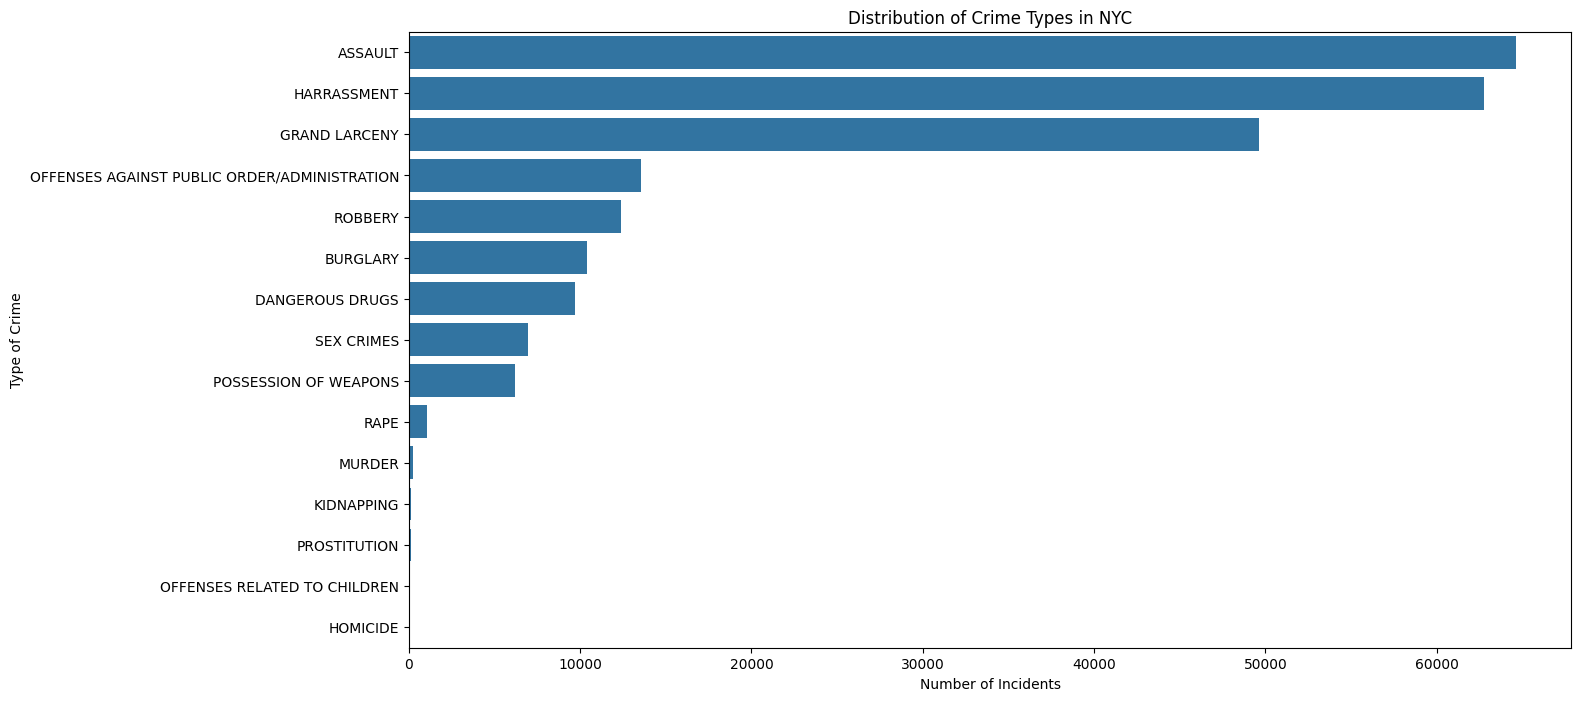

In [132]:
crime_type_counts = Complaint_map_df['OFNS_DESC'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index)
plt.title('Distribution of Crime Types in NYC')
plt.xlabel('Number of Incidents')
plt.ylabel('Type of Crime')
plt.show()

#### Suspect Age Group by Crime Type

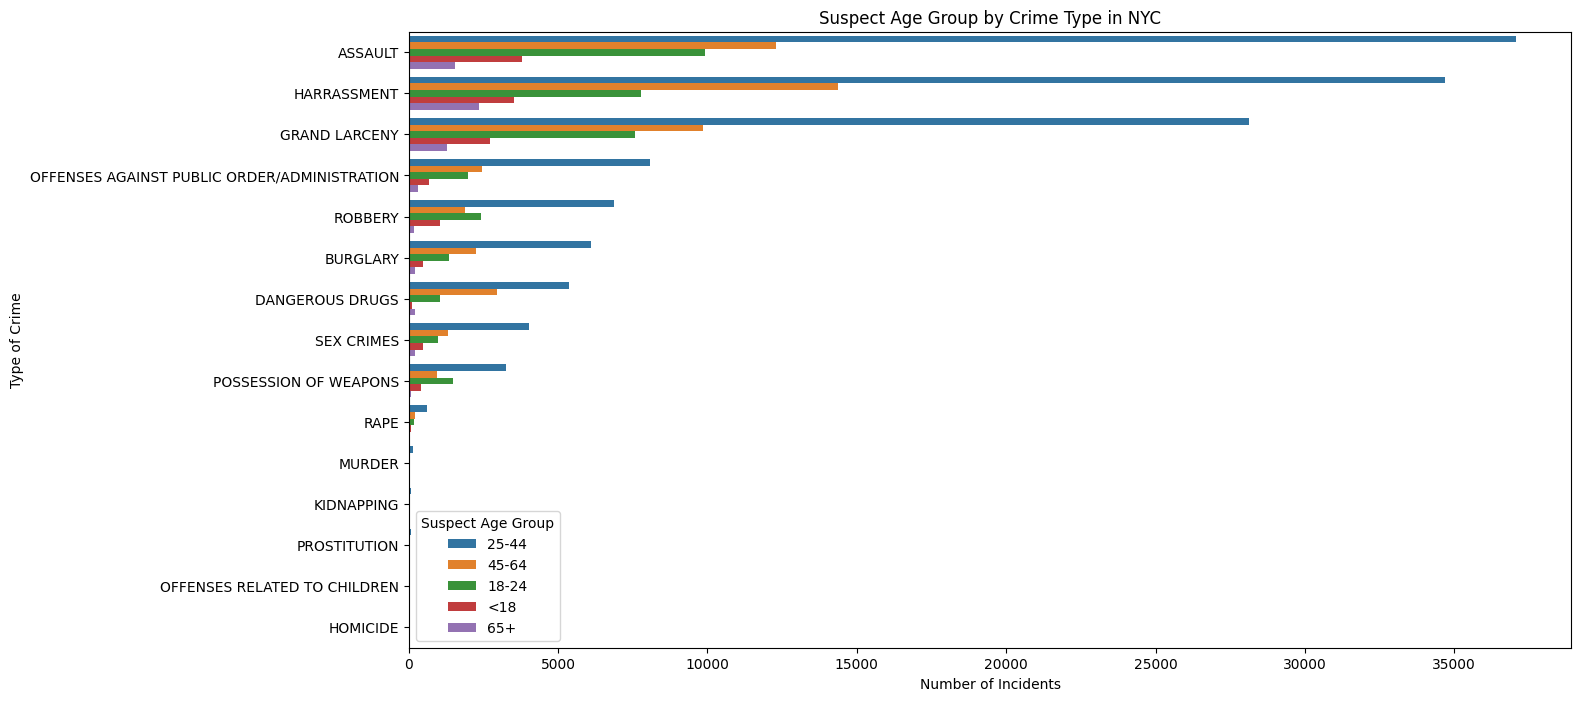

In [136]:
plt.figure(figsize=(15, 8))
sns.countplot(y='OFNS_DESC', hue='SUSP_AGE_GROUP', data=Complaint_map_df, order=Complaint_map_df['OFNS_DESC'].value_counts().index)
plt.title('Suspect Age Group by Crime Type in NYC')
plt.xlabel('Number of Incidents')
plt.ylabel('Type of Crime')
plt.legend(title='Suspect Age Group', loc='best')
plt.show()

#### Victim Age Group by Crime Type

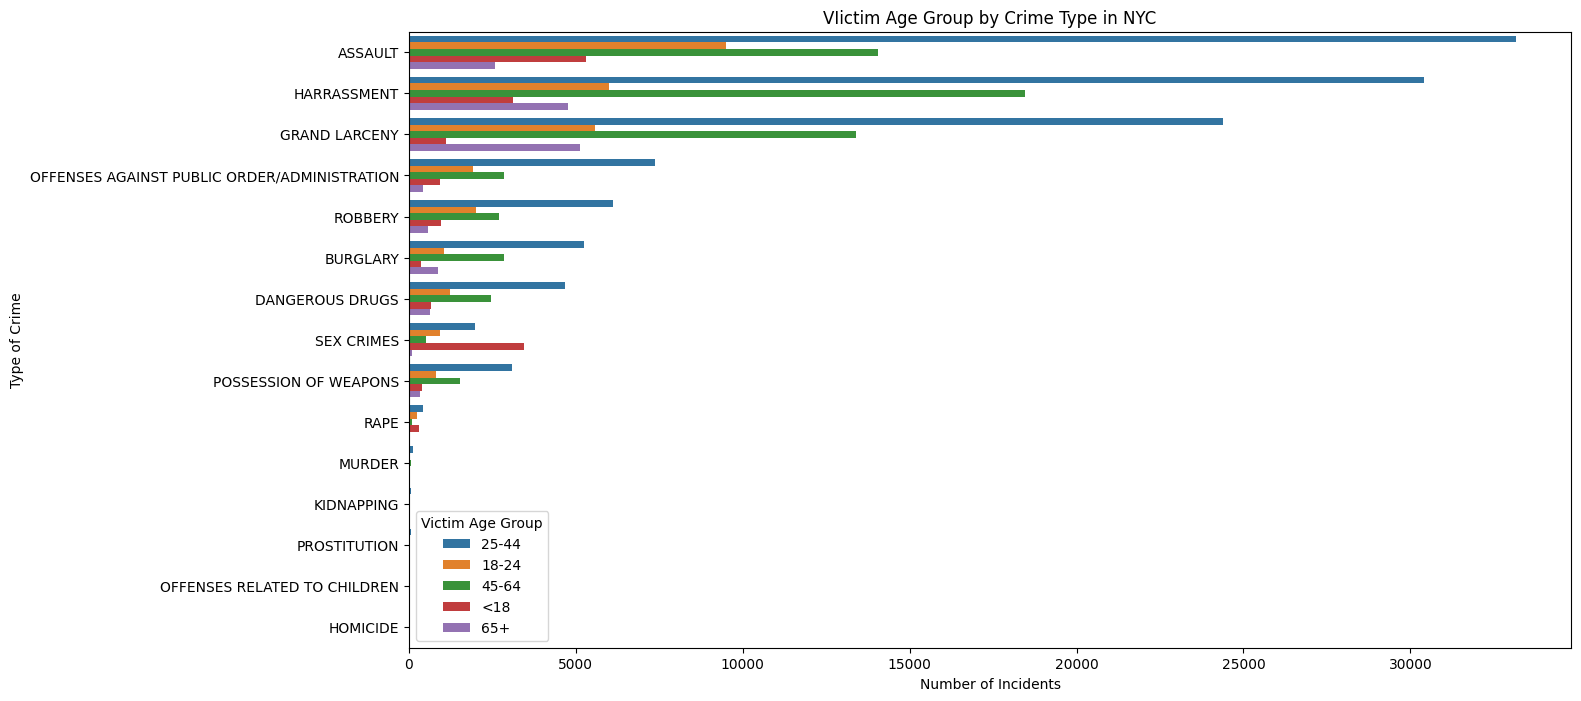

In [138]:
plt.figure(figsize=(15, 8))
sns.countplot(y='OFNS_DESC', hue='VIC_AGE_GROUP', data=Complaint_map_df, order=Complaint_map_df['OFNS_DESC'].value_counts().index)
plt.title('Victim Age Group by Crime Type in NYC')
plt.xlabel('Number of Incidents')
plt.ylabel('Type of Crime')
plt.legend(title='Victim Age Group', loc='best')
plt.show()

#### Victim Gender by Crime Type

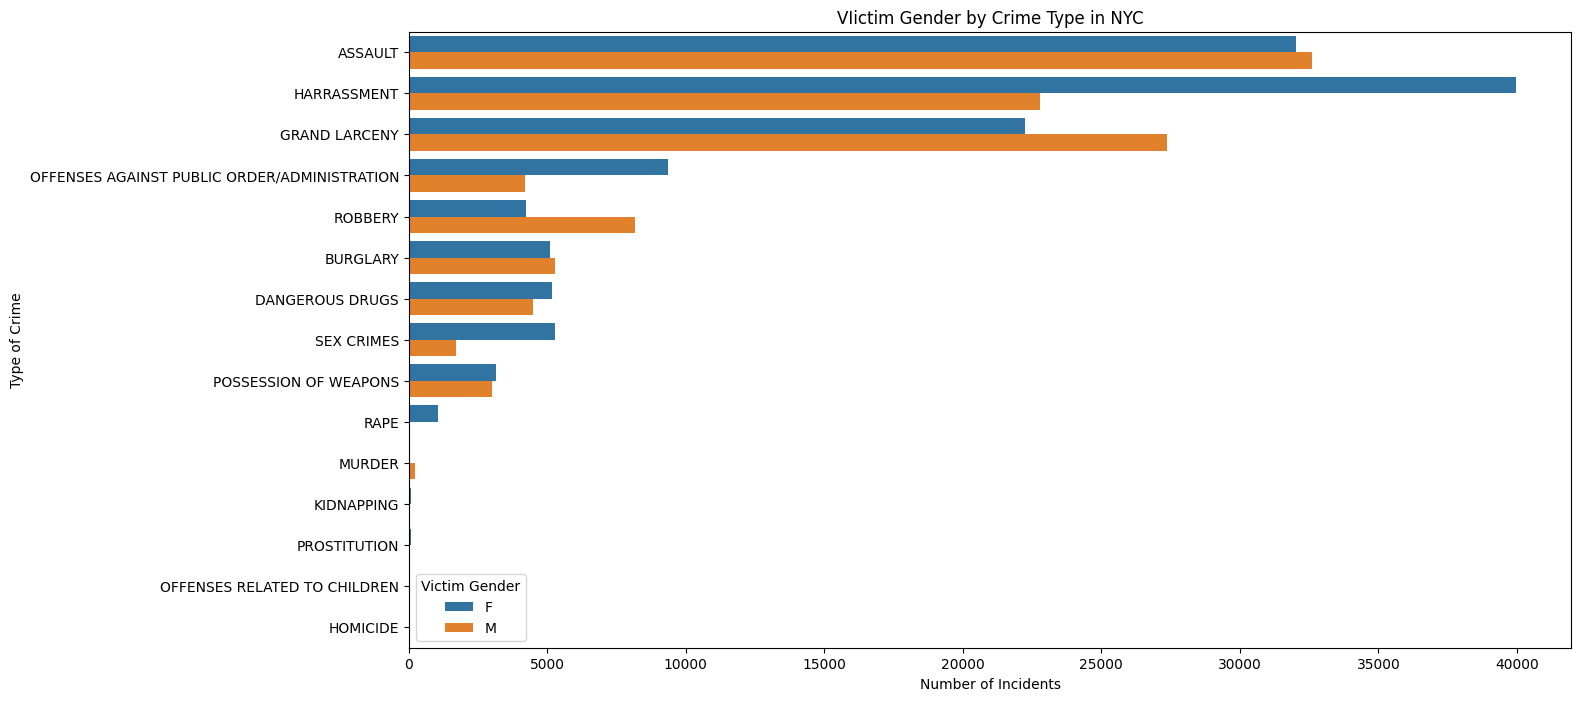

In [140]:
plt.figure(figsize=(15, 8))
sns.countplot(y='OFNS_DESC', hue='VIC_SEX', data=Complaint_map_df, order=Complaint_map_df['OFNS_DESC'].value_counts().index)
plt.title('Victim Gender by Crime Type in NYC')
plt.xlabel('Number of Incidents')
plt.ylabel('Type of Crime')
plt.legend(title='Victim Gender', loc='best')
plt.show()

### Suspect vs Victim

#### Victim Age Group vs. Suspect Age Group

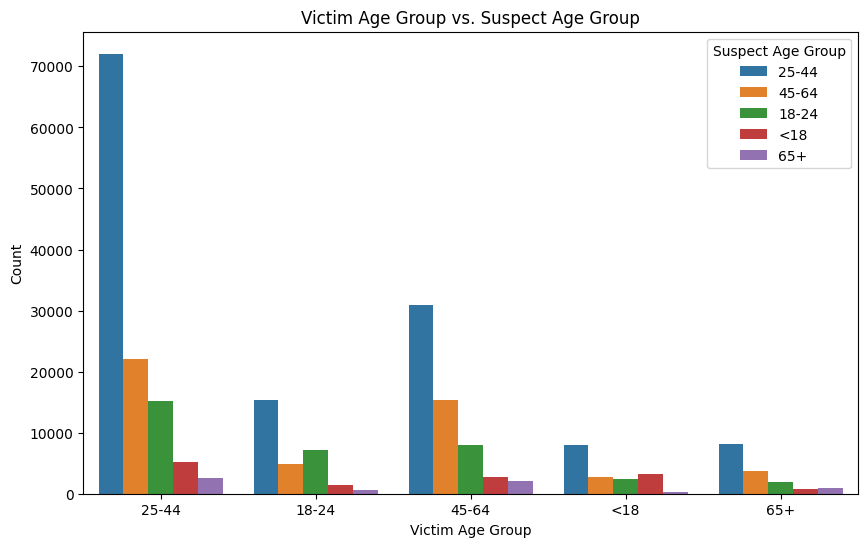

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_AGE_GROUP', hue='SUSP_AGE_GROUP', data=Complaint_map_df)
plt.title('Victim Age Group vs. Suspect Age Group')
plt.xlabel('Victim Age Group')
plt.ylabel('Count')
plt.legend(title='Suspect Age Group', loc='upper right')
plt.show()

#### Victim Race vs. Suspect Race

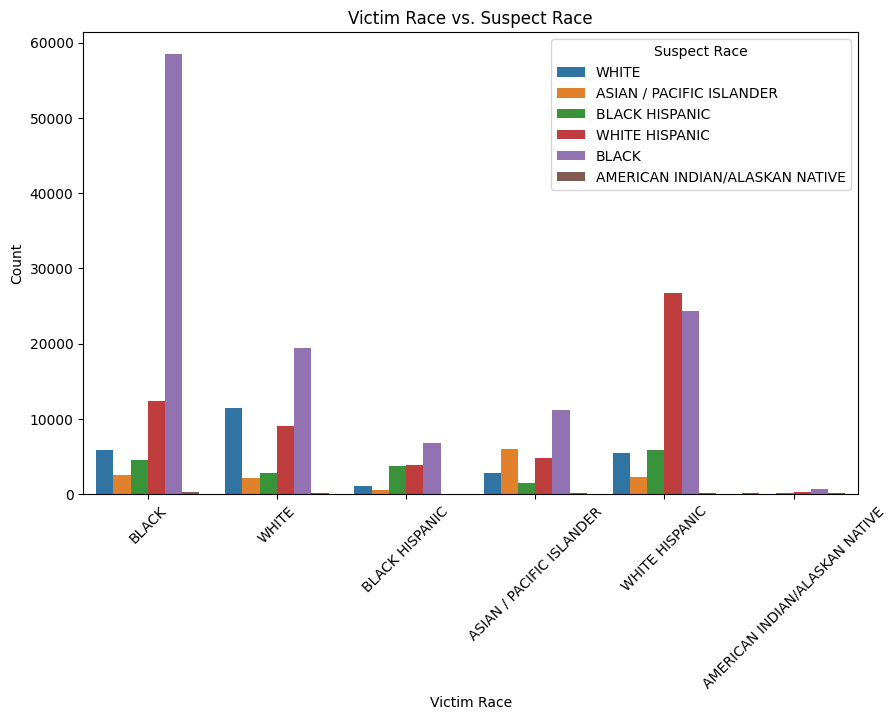

In [143]:
# Plotting Victim Race vs. Suspect Race
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_RACE', hue='SUSP_RACE', data=Complaint_map_df)
plt.title('Victim Race vs. Suspect Race')
plt.xlabel('Victim Race')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Suspect Race', loc='upper right')
plt.show()


### Unsafest Neighbordhoods race-wise

/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1721968225.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_precincts, x='VIC_RACE', y='ADDR_PCT_CD', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1721968225.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_precincts, x='VIC_RACE', y='ADDR_PCT_CD', palette='viridis', ax=axes[i])
/var/folders/05/g8zq9hzd1mb9q7x9_5v4rpw00000gn/T/ipykernel_1126/1721968225.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a

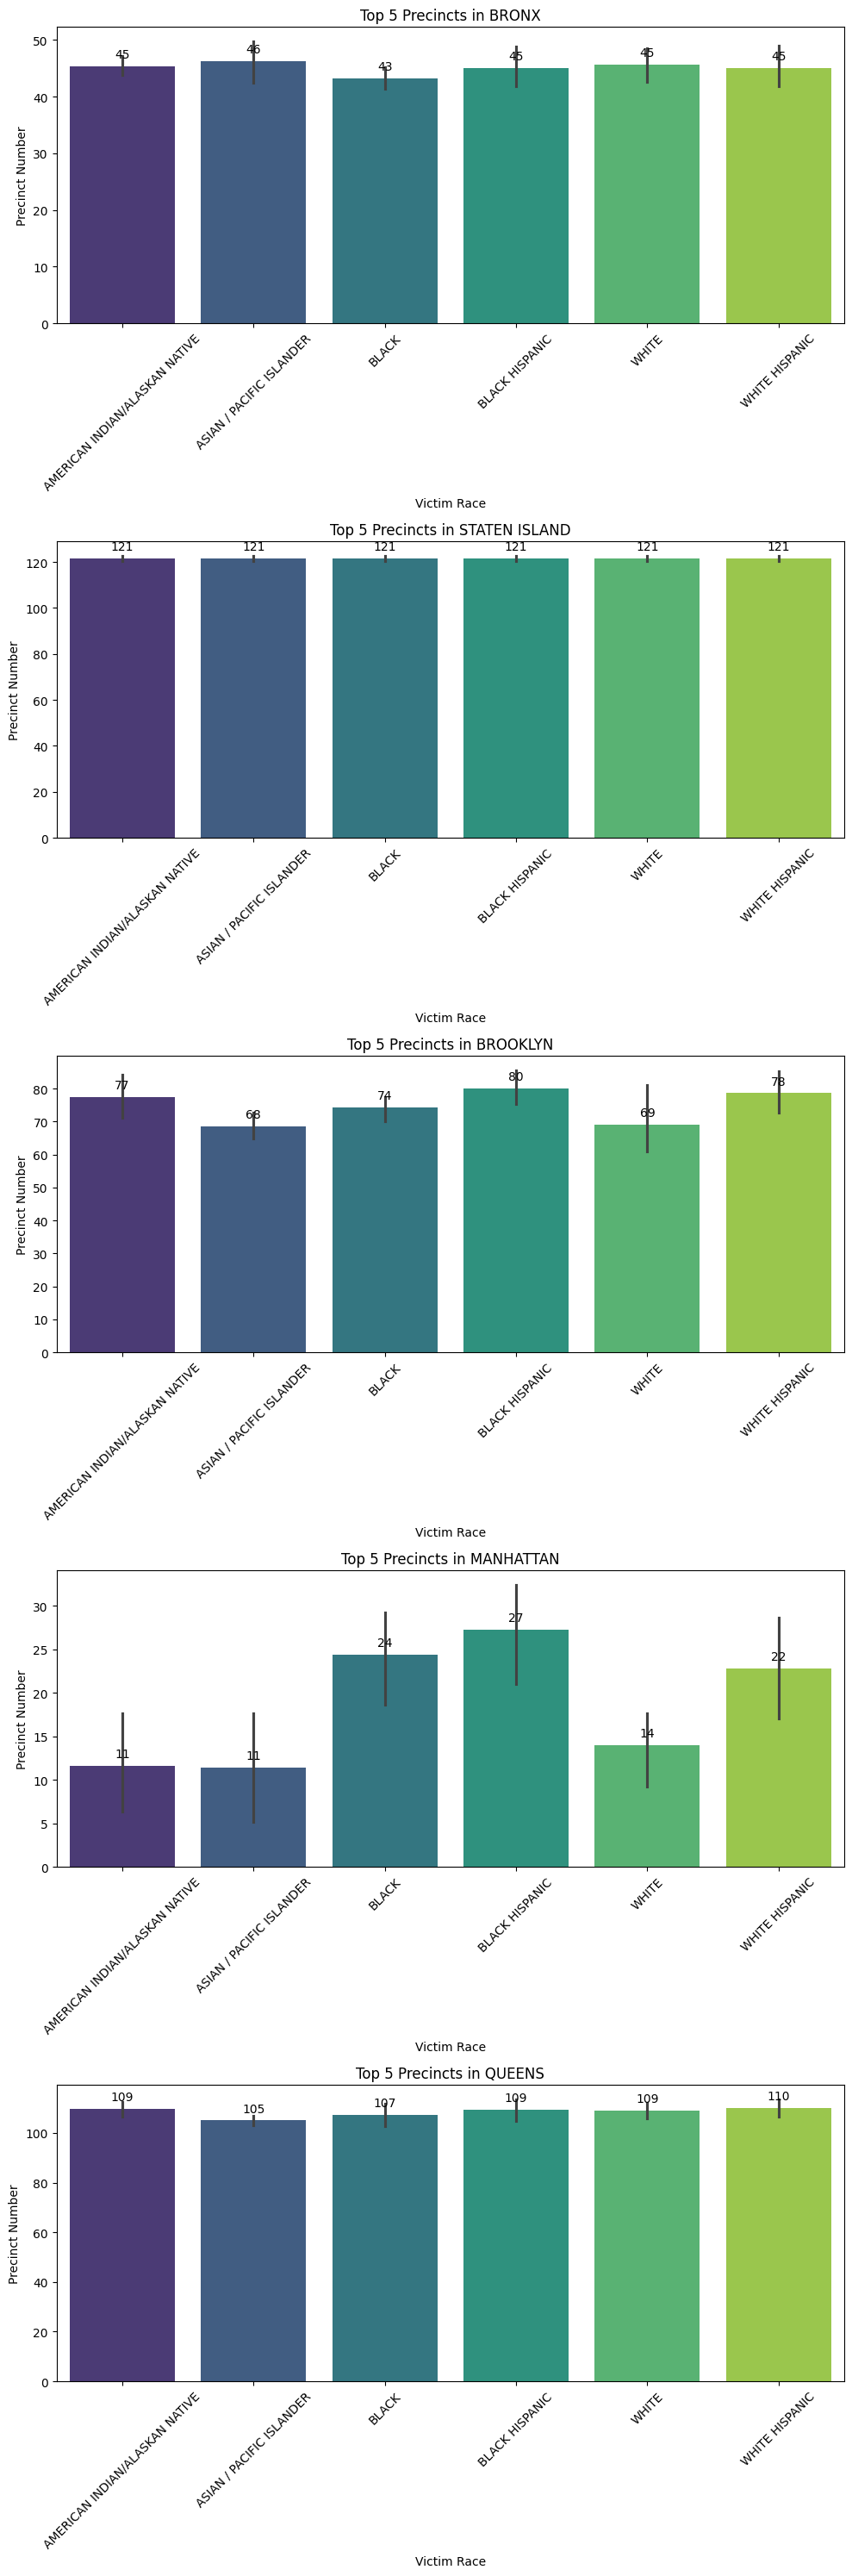

In [150]:
unique_boroughs = Complaint_map_df['BORO_NM'].unique()

# Determine the number of rows needed for the subplots
num_rows = len(unique_boroughs)

# Create subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows * 6))

# Loop through each borough and create plots
for i, borough in enumerate(unique_boroughs):
    # Filter data for the current borough
    filtered_data = Complaint_map_df[Complaint_map_df['BORO_NM'] == borough]

    # Group by VICTIM_RACE and ADDR_PCT_CD and count the complaints
    race_precinct_data = filtered_data.groupby(['VIC_RACE', 'ADDR_PCT_CD']).size().reset_index(name='counts')

    # Get top 5 precincts for each victim race
    top_precincts = race_precinct_data.groupby('VIC_RACE').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

    # Create a bar plot for the current borough
    ax = sns.barplot(data=top_precincts, x='VIC_RACE', y='ADDR_PCT_CD', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Top 5 Precincts in {borough}')
    axes[i].set_xlabel('Victim Race')
    axes[i].set_ylabel('Precinct Number')
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

### Suspect and Victim Age Distribution

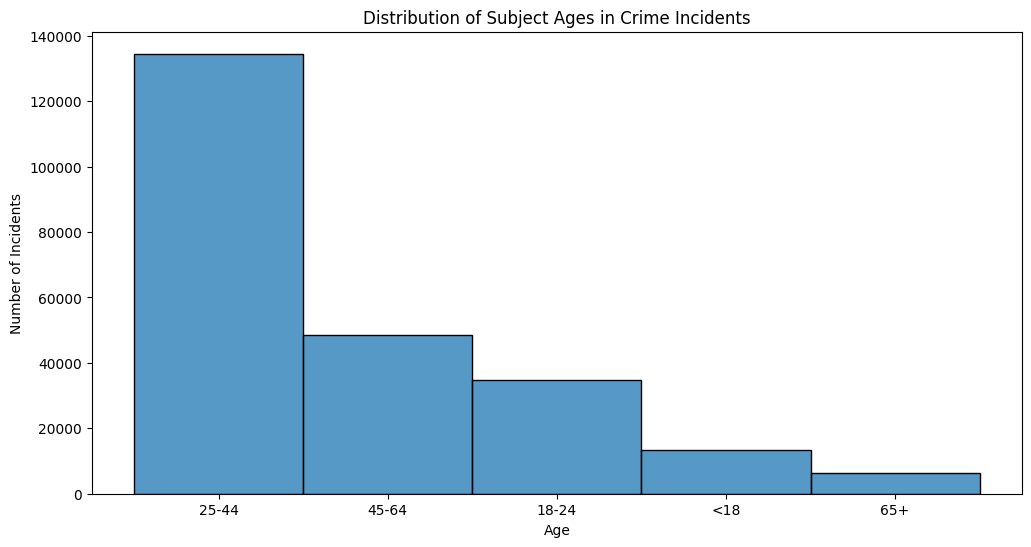

In [151]:
plt.figure(figsize=(12, 6))
sns.histplot(Complaint_map_df['SUSP_AGE_GROUP'], bins=16, kde=False)  # Adjust number of bins as needed
plt.title('Distribution of Suspect Ages')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.show()

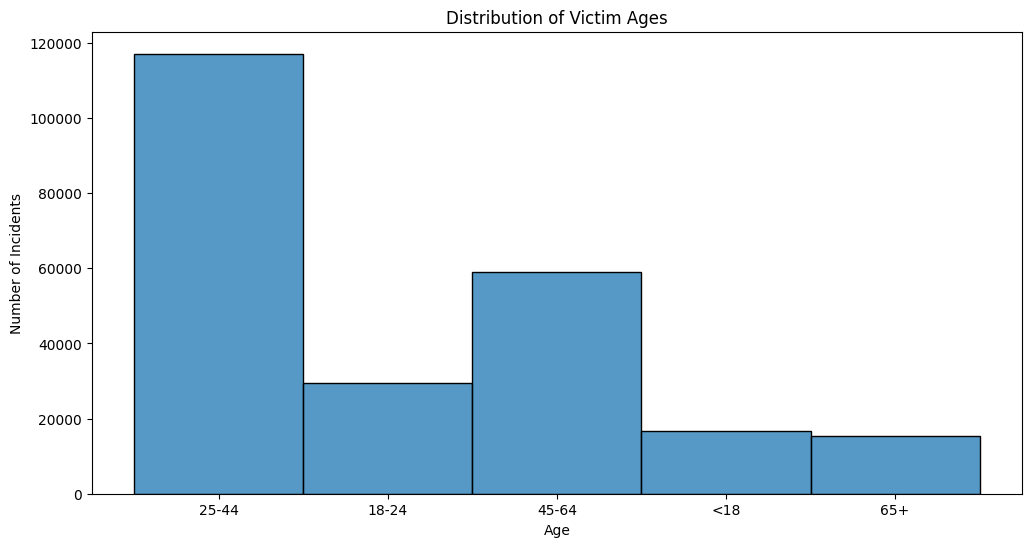

In [152]:
plt.figure(figsize=(12, 6))
sns.histplot(Complaint_map_df['VIC_AGE_GROUP'], bins=16, kde=False)  # Adjust number of bins as needed
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.show()

In [153]:
Complaint_map_df

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,PD_DESC,PREM_TYP_DESC,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
0,43,BRONX,2023-07-01,2023-11-20 05:00:00,RAPE,RAPE 1,(null),2023-07-01,25-44,WHITE,M,25-44,BLACK,F,40.822912,-73.870041
4,123,STATEN ISLAND,2023-08-03,2023-11-20 17:20:00,GRAND LARCENY,"LARCENY,GRAND FROM EATERY, UNATTENDED",FAST FOOD,2023-08-03,25-44,ASIAN / PACIFIC ISLANDER,M,18-24,WHITE,F,40.541709,-74.207482
11,120,STATEN ISLAND,2023-03-24,2023-11-20 08:15:00,GRAND LARCENY,"LARCENY,GRAND OF AUTO",STREET,2023-03-24,45-64,BLACK HISPANIC,M,45-64,BLACK HISPANIC,M,40.639472,-74.092840
16,72,BROOKLYN,2023-05-12,2023-11-20 16:00:00,GRAND LARCENY,"LARCENY,GRAND BY OPEN/COMPROMISE CELL PHONE ACCT",RESIDENCE-HOUSE,2023-05-13,25-44,WHITE HISPANIC,M,45-64,ASIAN / PACIFIC ISLANDER,M,40.639575,-74.012485
34,62,BROOKLYN,2023-01-15,2023-11-20 22:10:00,ASSAULT,ASSAULT POLICE/PEACE OFFICER,RESIDENCE-HOUSE,2023-01-15,18-24,ASIAN / PACIFIC ISLANDER,M,25-44,WHITE,F,40.611438,-74.011853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415303,103,QUEENS,2023-08-11,2023-11-20 14:50:00,HARRASSMENT,"HARASSMENT,SUBD 3,4,5",GROCERY/BODEGA,2023-08-11,25-44,BLACK,M,18-24,BLACK,M,40.713437,-73.760939
415304,105,QUEENS,2023-07-14,2023-11-20 08:28:00,HARRASSMENT,"HARASSMENT,SUBD 3,4,5",RESIDENCE-HOUSE,2023-07-14,18-24,BLACK,F,18-24,BLACK,F,40.664824,-73.753460
415305,103,QUEENS,2023-04-23,2023-11-20 03:55:00,ASSAULT,ASSAULT 3,BAR/NIGHT CLUB,2023-04-23,18-24,WHITE HISPANIC,M,25-44,BLACK HISPANIC,M,40.707937,-73.783565
415308,107,QUEENS,2023-06-06,2023-11-20 09:25:00,HARRASSMENT,"HARASSMENT,SUBD 3,4,5",BUS (NYC TRANSIT),2023-06-06,25-44,BLACK,M,25-44,BLACK,F,40.716656,-73.769140
